In [40]:
import pandas as pd
import numpy as np
from collections import Counter as c
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import pickle
from sklearn.linear_model import LinearRegression

In [41]:
df=pd.read_csv('./co2-emission.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [42]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [43]:
del df['MODEL']

In [44]:
df.columns=['Make','MODEL.1','Vehicles_class','Engine_Size','Cylinders','Transmission','Fuel_Type','Fuel_Consumption_City','Fuel_Consumption_Hwy','Fuel_Consumption_Comb(L/100km)','Fuel_Consumption_Comd(mpg)','CO2_Emissions']


In [45]:
df.columns

Index(['Make', 'MODEL.1', 'Vehicles_class', 'Engine_Size', 'Cylinders',
       'Transmission', 'Fuel_Type', 'Fuel_Consumption_City',
       'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb(L/100km)',
       'Fuel_Consumption_Comd(mpg)', 'CO2_Emissions'],
      dtype='object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Make                            1067 non-null   int64  
 1   MODEL.1                         1067 non-null   object 
 2   Vehicles_class                  1067 non-null   object 
 3   Engine_Size                     1067 non-null   float64
 4   Cylinders                       1067 non-null   int64  
 5   Transmission                    1067 non-null   object 
 6   Fuel_Type                       1067 non-null   object 
 7   Fuel_Consumption_City           1067 non-null   float64
 8   Fuel_Consumption_Hwy            1067 non-null   float64
 9   Fuel_Consumption_Comb(L/100km)  1067 non-null   float64
 10  Fuel_Consumption_Comd(mpg)      1067 non-null   int64  
 11  CO2_Emissions                   1067 non-null   int64  
dtypes: float64(4), int64(4), object(4)

In [47]:
df.describe()

,Make,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb(L/100km),Fuel_Consumption_Comd(mpg),CO2_Emissions
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [48]:
np.unique(df.dtypes,return_counts=True)

(array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object),
 array([4, 4, 4], dtype=int64))

In [49]:
cat=df.dtypes[df.dtypes=='O'].index.values

In [50]:
cat

array(['MODEL.1', 'Vehicles_class', 'Transmission', 'Fuel_Type'],
      dtype=object)

In [51]:
for i in cat:
    print("Column : ",i)
    print("Count of classes : ",df[i].nunique())
    print(c(df[i]))
    print("*"*120)

Column :  MODEL.1
Count of classes :  39
Counter({'FORD': 90, 'CHEVROLET': 86, 'BMW': 64, 'MERCEDES-BENZ': 59, 'AUDI': 49, 'GMC': 49, 'TOYOTA': 49, 'PORSCHE': 44, 'VOLKSWAGEN': 42, 'DODGE': 39, 'MINI': 36, 'KIA': 33, 'NISSAN': 33, 'CADILLAC': 32, 'JEEP': 31, 'MAZDA': 27, 'HYUNDAI': 24, 'SUBARU': 23, 'JAGUAR': 22, 'LEXUS': 22, 'HONDA': 21, 'INFINITI': 21, 'CHRYSLER': 19, 'LAND ROVER': 19, 'BUICK': 16, 'MITSUBISHI': 16, 'RAM': 13, 'ACURA': 12, 'LINCOLN': 11, 'VOLVO': 11, 'FIAT': 10, 'SCION': 9, 'BENTLEY': 8, 'ASTON MARTIN': 7, 'ROLLS-ROYCE': 7, 'MASERATI': 6, 'LAMBORGHINI': 3, 'SMART': 2, 'SRT': 2})
************************************************************************************************************************
Column :  Vehicles_class
Count of classes :  16
Counter({'MID-SIZE': 178, 'COMPACT': 172, 'SUV - SMALL': 154, 'SUV - STANDARD': 110, 'FULL-SIZE': 86, 'TWO-SEATER': 71, 'SUBCOMPACT': 65, 'PICKUP TRUCK - STANDARD': 62, 'MINICOMPACT': 47, 'STATION WAGON - SMALL': 36, 'VAN - PA

In [52]:
df["Transmission"]=np.where(df["Transmission"].isin(["A4","A5","A3"]),"Automatic",df["Transmission"])
df["Transmission"]=np.where(df["Transmission"].isin(["M5","M6"]),"Manual",df["Transmission"])
df["Transmission"]=np.where(df["Transmission"].isin(["AS4","AS5"]),"Automatic with Select Shift",df["Transmission"])
df["Transmission"]=np.where(df["Transmission"].isin(["AV"]),"Continuously Variable",df["Transmission"])
c(df["Transmission"])

Counter({'Automatic with Select Shift': 11,
         'Manual': 189,
         'AV7': 5,
         'AS6': 189,
         'A6': 222,
         'AM7': 34,
         'AV8': 3,
         'AS8': 80,
         'A7': 12,
         'A8': 87,
         'M7': 9,
         'Automatic': 75,
         'Continuously Variable': 46,
         'AM6': 6,
         'AS7': 76,
         'A9': 8,
         'AS9': 2,
         'AV6': 11,
         'AM5': 2})

In [53]:
df["Fuel_Type"]=np.where(df["Fuel_Type"]=="Z","Premium Gasoline",df["Fuel_Type"])
df["Fuel_Type"]=np.where(df["Fuel_Type"]=='X',"Regular Gasoline",df["Fuel_Type"])
df["Fuel_Type"]=np.where(df["Fuel_Type"]=="D","Diesel",df["Fuel_Type"])
df["Fuel_Type"]=np.where(df["Fuel_Type"]=="E","Ethanol(E85)",df["Fuel_Type"])
df["Fuel_Type"]=np.where(df["Fuel_Type"]=="N","Natural Gas",df["Fuel_Type"])
c(df["Fuel_Type"])

Counter({'Premium Gasoline': 434,
         'Diesel': 27,
         'Regular Gasoline': 514,
         'Ethanol(E85)': 92})

In [54]:
df.dtypes[df.dtypes!='O'].index.values

array(['Make', 'Engine_Size', 'Cylinders', 'Fuel_Consumption_City',
       'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb(L/100km)',
       'Fuel_Consumption_Comd(mpg)', 'CO2_Emissions'], dtype=object)

In [55]:
df.isnull().sum()

Make                              0
MODEL.1                           0
Vehicles_class                    0
Engine_Size                       0
Cylinders                         0
Transmission                      0
Fuel_Type                         0
Fuel_Consumption_City             0
Fuel_Consumption_Hwy              0
Fuel_Consumption_Comb(L/100km)    0
Fuel_Consumption_Comd(mpg)        0
CO2_Emissions                     0
dtype: int64

In [56]:
from sklearn.preprocessing import LabelEncoder
x='*'
for i in cat:
    print("LABEL ENCODING OF : ",i)
    LE=LabelEncoder()
    print(c(df[i]))
    df[i]=LE.fit_transform(df[i])
    print(c(df[i]))
    print(x*100)

LABEL ENCODING OF :  MODEL.1
Counter({'FORD': 90, 'CHEVROLET': 86, 'BMW': 64, 'MERCEDES-BENZ': 59, 'AUDI': 49, 'GMC': 49, 'TOYOTA': 49, 'PORSCHE': 44, 'VOLKSWAGEN': 42, 'DODGE': 39, 'MINI': 36, 'KIA': 33, 'NISSAN': 33, 'CADILLAC': 32, 'JEEP': 31, 'MAZDA': 27, 'HYUNDAI': 24, 'SUBARU': 23, 'JAGUAR': 22, 'LEXUS': 22, 'HONDA': 21, 'INFINITI': 21, 'CHRYSLER': 19, 'LAND ROVER': 19, 'BUICK': 16, 'MITSUBISHI': 16, 'RAM': 13, 'ACURA': 12, 'LINCOLN': 11, 'VOLVO': 11, 'FIAT': 10, 'SCION': 9, 'BENTLEY': 8, 'ASTON MARTIN': 7, 'ROLLS-ROYCE': 7, 'MASERATI': 6, 'LAMBORGHINI': 3, 'SMART': 2, 'SRT': 2})
Counter({11: 90, 7: 86, 4: 64, 25: 59, 2: 49, 12: 49, 36: 49, 29: 44, 37: 42, 9: 39, 26: 36, 18: 33, 28: 33, 6: 32, 17: 31, 24: 27, 14: 24, 35: 23, 16: 22, 21: 22, 13: 21, 15: 21, 8: 19, 20: 19, 5: 16, 27: 16, 30: 13, 0: 12, 22: 11, 38: 11, 10: 10, 32: 9, 3: 8, 1: 7, 31: 7, 23: 6, 19: 3, 33: 2, 34: 2})
****************************************************************************************************
LA

In [57]:
MCO2=df.groupby(['Make'])['CO2_Emissions'].mean().sort_values()[:20].reset_index()

<AxesSubplot:xlabel='Make', ylabel='CO2_Emissions'>

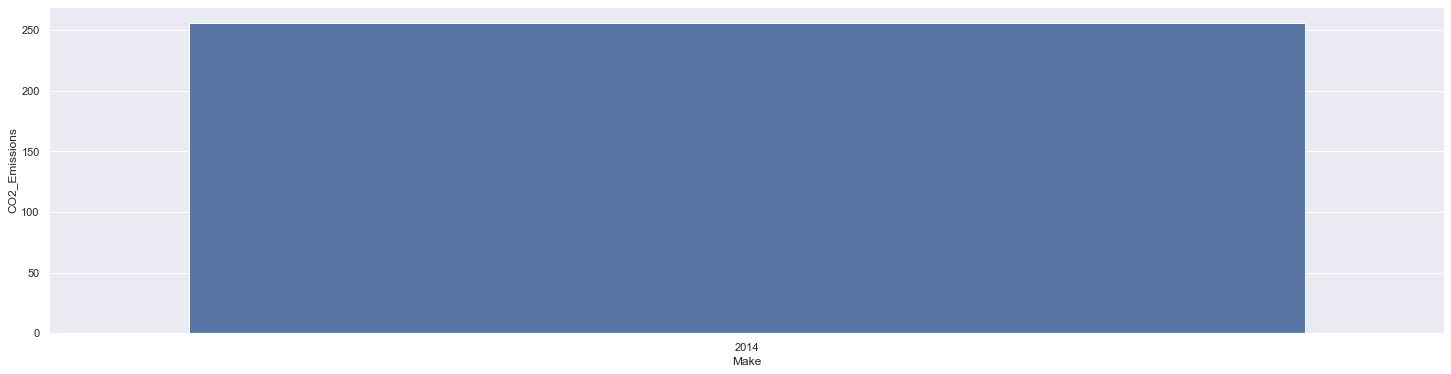

In [58]:
plt.figure(figsize=(25,6))
sns.barplot(x="Make",y="CO2_Emissions",data=MCO2)

In [59]:
VC=df.groupby(['Vehicles_class'])['CO2_Emissions'].mean().sort_values(ascending=False)[:20].reset_index()
plt.figure(figsize=(20,6))

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<AxesSubplot:xlabel='Vehicles_class', ylabel='CO2_Emissions'>

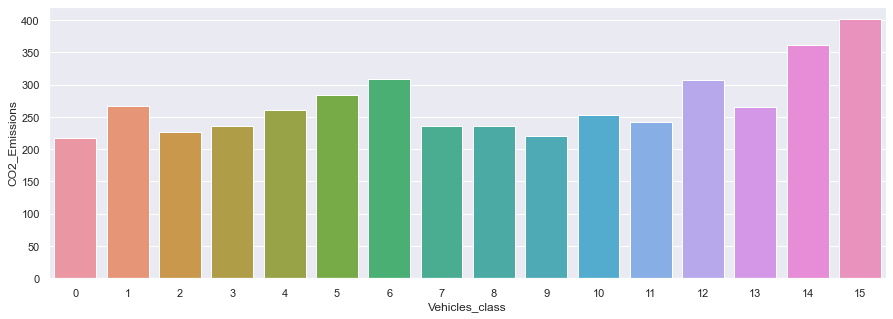

In [60]:
sns.barplot(x='Vehicles_class',y='CO2_Emissions',data=VC)

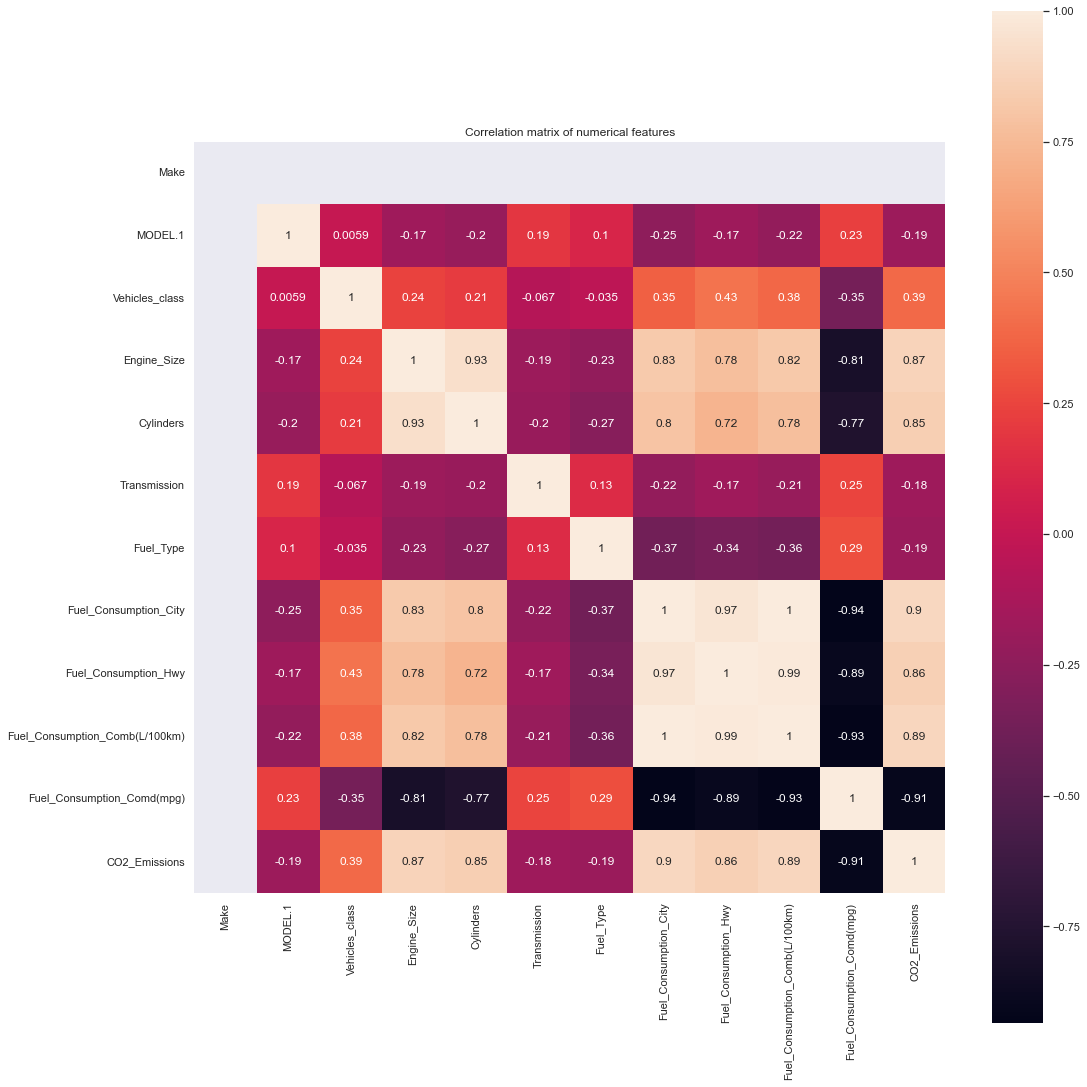

In [61]:
corr=df.corr()
plt.subplots(figsize=(16,16))
sns.heatmap(corr,annot=True,square=True)
plt.title("Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

<AxesSubplot:>

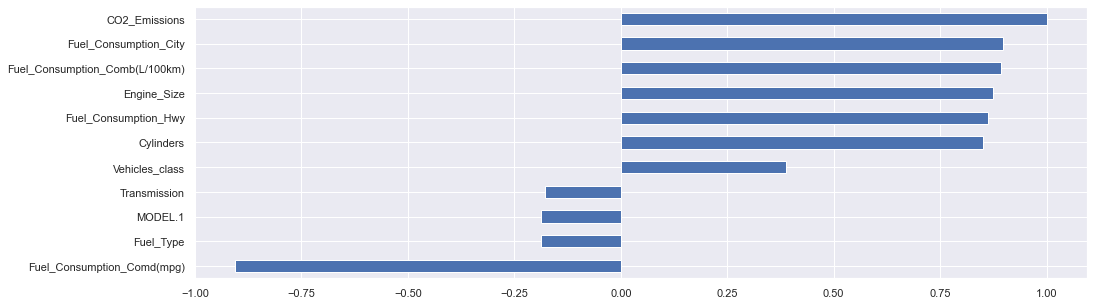

In [62]:
plt.figure(figsize=(16,5))
corr["CO2_Emissions"].sort_values(ascending=True)[:-1].plot(kind="barh")

In [63]:
x=df.drop(['CO2_Emissions','Fuel_Consumption_Comb(L/100km)','MODEL.1','Make'],axis=1)
x=pd.DataFrame(x)
y=df['CO2_Emissions']
y=pd.DataFrame(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape)
print(x_test.shape)
print(x)
x.tail()

(853, 8)
(214, 8)
      Vehicles_class  Engine_Size  Cylinders  Transmission  Fuel_Type  \
0                  0          2.0          4            15          2   
1                  0          2.4          4            18          2   
2                  0          1.5          4            12          2   
3                 11          3.5          6             7          2   
4                 11          3.5          6             7          2   
...              ...          ...        ...           ...        ...   
1062              11          3.0          6             7          3   
1063              11          3.2          6             7          3   
1064              11          3.0          6             7          3   
1065              11          3.2          6             7          3   
1066              12          3.2          6             7          3   

      Fuel_Consumption_City  Fuel_Consumption_Hwy  Fuel_Consumption_Comd(mpg)  
0                       9

,Vehicles_class,Engine_Size,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comd(mpg)
1062,11,3.0,6,7,3,13.4,9.8,24
1063,11,3.2,6,7,3,13.2,9.5,25
1064,11,3.0,6,7,3,13.4,9.8,24
1065,11,3.2,6,7,3,12.9,9.3,25
1066,12,3.2,6,7,3,14.9,10.2,22


In [64]:
print(x_train)

     Vehicles_class  Engine_Size  Cylinders  Transmission  Fuel_Type  \
645              12          3.0          6             9          1   
939              13          1.0          3             4          2   
70               10          4.0          8             9          2   
200               2          1.8          4            18          3   
470              12          5.3          8             0          1   
..              ...          ...        ...           ...        ...   
360              11          2.0          4             7          3   
466              11          2.4          4             0          3   
299               2          5.7          8            14          3   
493              11          2.4          4            14          3   
527               2          3.7          6             8          2   

     Fuel_Consumption_City  Fuel_Consumption_Hwy  Fuel_Consumption_Comd(mpg)  
645                   19.4                  14.9        

In [65]:
x

,Vehicles_class,Engine_Size,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comd(mpg)
0,0,2.0,4,15,2,9.9,6.7,33
1,0,2.4,4,18,2,11.2,7.7,29
2,0,1.5,4,12,2,6.0,5.8,48
3,11,3.5,6,7,2,12.7,9.1,25
4,11,3.5,6,7,2,12.1,8.7,27
...,...,...,...,...,...,...,...,...
1062,11,3.0,6,7,3,13.4,9.8,24
1063,11,3.2,6,7,3,13.2,9.5,25
1064,11,3.0,6,7,3,13.4,9.8,24
1065,11,3.2,6,7,3,12.9,9.3,25


In [66]:
lr=LinearRegression()
lr=lr.fit(x_train,y_train)

In [67]:
x_train

,Vehicles_class,Engine_Size,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comd(mpg)
645,12,3.0,6,9,1,19.4,14.9,16
939,13,1.0,3,4,2,6.9,5.7,44
70,10,4.0,8,9,2,16.8,10.3,20
200,2,1.8,4,18,3,9.5,6.5,34
470,12,5.3,8,0,1,21.5,14.6,15
...,...,...,...,...,...,...,...,...
360,11,2.0,4,7,3,11.2,8.5,28
466,11,2.4,4,0,3,11.5,8.2,28
299,2,5.7,8,14,3,15.8,9.2,22
493,11,2.4,4,14,3,10.6,7.9,30


In [68]:
y_pred=lr.predict(x_test)
y_pred.shape

(214, 1)

In [69]:
y_pred
print(y_test['CO2_Emissions'])

455    292
954    288
738    301
913    286
702    170
      ... 
311    235
848    251
508    258
330    276
476    354
Name: CO2_Emissions, Length: 214, dtype: int64


In [70]:
y_pred.shape

(214, 1)

In [71]:
y_test.shape

(214, 1)

In [72]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=100, random_state=0)

randfor.fit(x_train, y_train)

y_pred_rf = randfor.predict(x_test)
print(y_pred_rf)

C:\Users\saivi\AppData\Local\Temp\ipykernel_10924\2720103329.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randfor.fit(x_train, y_train)


[299 288 301 244 177 168 320 380 347 258 235 198 315 255 340 260 285 196
 202 393 209 161 299 168 230 389 258 264 242 221 264 271 260 306 346 244
 184 200 209 393 202 310 191 237 265 297 347 299 393 310 269 255 290 196
 237 278 237 179 177 278 290 283 281 145 179 136 317 317 193 237 259 269
 306 435 239 191 177 382 274 230 269 168 212 175 334 138 197 253 216 414
 177 308 356 419 198 336 216 200 237 216 239 184 398 225 315 380 126 274
 200 209 230 260 294 297 317 315 380 288 288 235 290 283 239 380 191 362
 262 354 138 278 297 409 202 209 251 222 207 196 251 221 251 165 196 207
 209 262 191 230 283 347 235 216 232 338 191 278 202 237 380 232 184 198
 179 336 209 179 340 225 253 235 274 175 294 359 198 221 138 207 163 207
 398 209 285 324 354 197 184 196 246 230 168 278 419 179 292 196 182 251
 310 292 253 317 209 285 232 317 177 216 237 237 253 262 276 346]


In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

MAE:  13.02643223516729
MSE: 366.4911334589439
RMSE: 19.143958145037402


In [74]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)*100


92.08557205135328

In [75]:
r2_score(y_test,y_pred_rf)*100

98.14231325680696

In [76]:
score_lr=r2_score(y_test,y_pred)
score_rf=r2_score(y_test,y_pred_rf)

C:\Users\saivi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

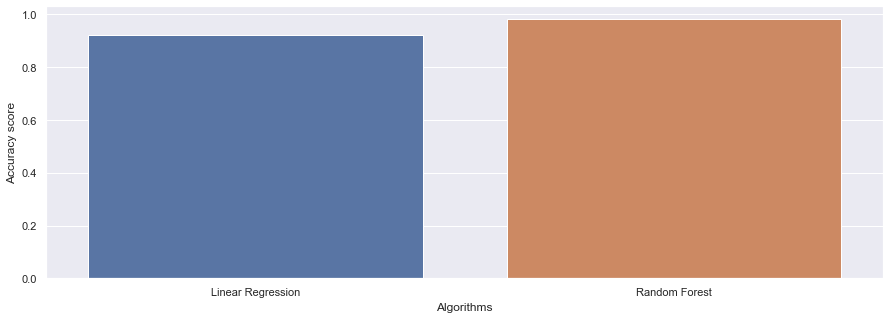

In [77]:
scores = [score_lr,score_rf]
algorithms = ["Linear Regression","Random Forest"] 
sns.set(rc={'figure.figsize':(15,5)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [78]:
pickle.dump(randfor,open('co2.pkl','wb'))